In [1]:
!pip install labelme tensorflow  opencv-python matplotlib albumentations

In [2]:
import os
import time
import uuid
import cv2


In [3]:
IMAGES_PATH=os.path.join('data','images')
number_images=30

In [4]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [36]:
!labelme


In [5]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [6]:
import json
print(json.__version__)

2.0.9


In [7]:
import numpy as np
print(np.__version__)

1.23.5


In [8]:
from matplotlib import pyplot as plt
!pip show matplotlib


Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: d:\dfdm\dfdm\lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: imgviz, labelme


In [9]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [10]:
images.as_numpy_iterator().next()

b'data\\images\\ace77368-ee92-11ed-8051-d03c1f5113cc.jpg'

In [11]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images = images.map(load_image)

In [13]:
images.as_numpy_iterator().next()

array([[[158, 165, 157],
        [161, 168, 160],
        [163, 170, 163],
        ...,
        [147, 144, 137],
        [152, 147, 141],
        [152, 147, 141]],

       [[157, 164, 156],
        [160, 167, 159],
        [163, 170, 163],
        ...,
        [148, 145, 138],
        [153, 148, 142],
        [154, 149, 143]],

       [[159, 166, 158],
        [161, 168, 160],
        [164, 169, 162],
        ...,
        [148, 145, 138],
        [153, 149, 140],
        [155, 151, 142]],

       ...,

       [[135, 135, 135],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [ 52,  52,  60],
        [ 53,  53,  61],
        [ 53,  53,  61]],

       [[135, 135, 135],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [ 51,  54,  59],
        [ 51,  54,  59],
        [ 51,  54,  59]],

       [[135, 135, 135],
        [134, 134, 134],
        [135, 135, 135],
        ...,
        [ 50,  53,  58],
        [ 50,  54,  57],
        [ 49,  53,  56]]

In [14]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [15]:
image_generator = images.batch(4).as_numpy_iterator()

In [16]:
plot_images = image_generator.next()

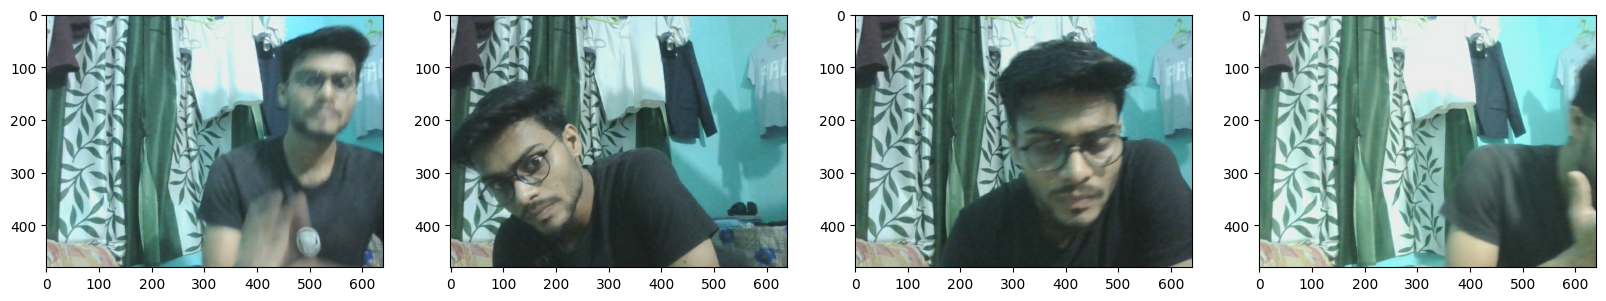

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [18]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [19]:
import albumentations as alb

In [20]:
print(alb.__version__)

1.3.0


In [21]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [22]:
img = cv2.imread(os.path.join('data','train', 'images','35edab72-eca0-11ed-b173-d03c1f5113cc.jpg'))


In [23]:
img

array([[[190, 155,  51],
        [190, 155,  51],
        [189, 155,  48],
        ...,
        [150, 120,  37],
        [152, 119,  39],
        [154, 121,  41]],

       [[189, 154,  50],
        [190, 156,  49],
        [190, 156,  49],
        ...,
        [149, 119,  36],
        [152, 119,  39],
        [153, 120,  40]],

       [[189, 155,  48],
        [191, 157,  50],
        [191, 157,  50],
        ...,
        [149, 120,  35],
        [152, 120,  37],
        [152, 120,  37]],

       ...,

       [[187, 220, 229],
        [188, 221, 230],
        [188, 221, 230],
        ...,
        [ 92,  62,  61],
        [ 99,  71,  71],
        [107,  78,  81]],

       [[186, 219, 228],
        [187, 220, 229],
        [188, 221, 230],
        ...,
        [115,  84,  87],
        [110,  80,  85],
        [105,  77,  83]],

       [[183, 216, 225],
        [185, 218, 227],
        [187, 220, 229],
        ...,
        [164, 132, 137],
        [162, 131, 138],
        [155, 126, 135]]

In [24]:
with open(os.path.join('data', 'train', 'labels', '35edab72-eca0-11ed-b173-d03c1f5113cc.json'), 'r') as f:
    label = json.load(f)

In [25]:
label['shapes'][0]['points']

[[268.96907216494844, 220.41237113402062],
 [411.2371134020619, 396.70103092783506]]

In [26]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [27]:
coords

[268.96907216494844, 220.41237113402062, 411.2371134020619, 396.70103092783506]

In [28]:
coords = list(np.divide(coords, [640,480,640,480]))

In [29]:
coords

[0.42026417525773196,
 0.45919243986254293,
 0.6425579896907216,
 0.8264604810996564]

In [30]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [31]:
augmented['bboxes'][0][2:]

(0.7316380297823596, 0.574639175257732)

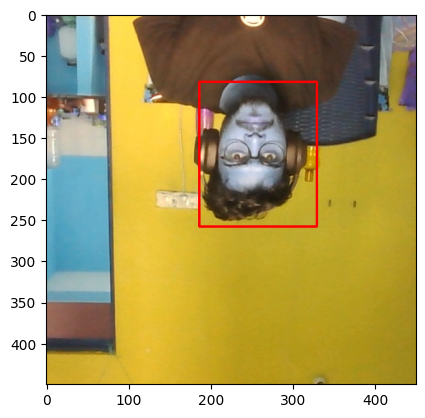

In [32]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [33]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type


In [34]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [35]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [36]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [37]:
train_images.as_numpy_iterator().next()

array([[[0.1966299 , 0.16188726, 0.14852941],
        [0.1903799 , 0.1786152 , 0.18272059],
        [0.21053922, 0.21642157, 0.23860294],
        ...,
        [0.9821691 , 0.8963848 , 0.6596201 ],
        [0.9754902 , 0.89571077, 0.63167894],
        [0.9710172 , 0.9014093 , 0.6313726 ]],

       [[0.19528186, 0.17959559, 0.1786152 ],
        [0.20741421, 0.21231617, 0.2329044 ],
        [0.18235295, 0.21623774, 0.2528799 ],
        ...,
        [0.9759804 , 0.89754903, 0.6573529 ],
        [0.972549  , 0.8980392 , 0.6392157 ],
        [0.9689338 , 0.894424  , 0.6306985 ]],

       [[0.20183824, 0.17408088, 0.15557598],
        [0.2038603 , 0.20490196, 0.21519607],
        [0.18523285, 0.2122549 , 0.25061274],
        ...,
        [0.9716299 , 0.8966912 , 0.63829654],
        [0.97996324, 0.90545344, 0.6348652 ],
        [0.972549  , 0.8980392 , 0.63008577]],

       ...,

       [[0.20637254, 0.55833334, 0.57254905],
        [0.20049019, 0.55735296, 0.56911767],
        [0.20790441, 0

In [38]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [39]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [40]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [41]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [42]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.123 , 0.154 , 0.462 , 0.5776], dtype=float16))

In [43]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [44]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [45]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [46]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [47]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3972 , 0.     , 0.8086 , 0.4902 ],
        [0.4717 , 0.4368 , 0.9507 , 1.     ],
        [0.745  , 0.1652 , 1.     , 0.7285 ],
        [0.4426 , 0.     , 0.922  , 0.51   ],
        [0.     , 0.3193 , 0.09247, 1.     ],
        [0.2969 , 0.     , 0.6475 , 0.4434 ],
        [0.     , 0.639  , 0.2795 , 1.     ],
        [0.3716 , 0.4495 , 0.763  , 0.965  ]], dtype=float16))

In [48]:
data_samples = train.as_numpy_iterator()

In [49]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


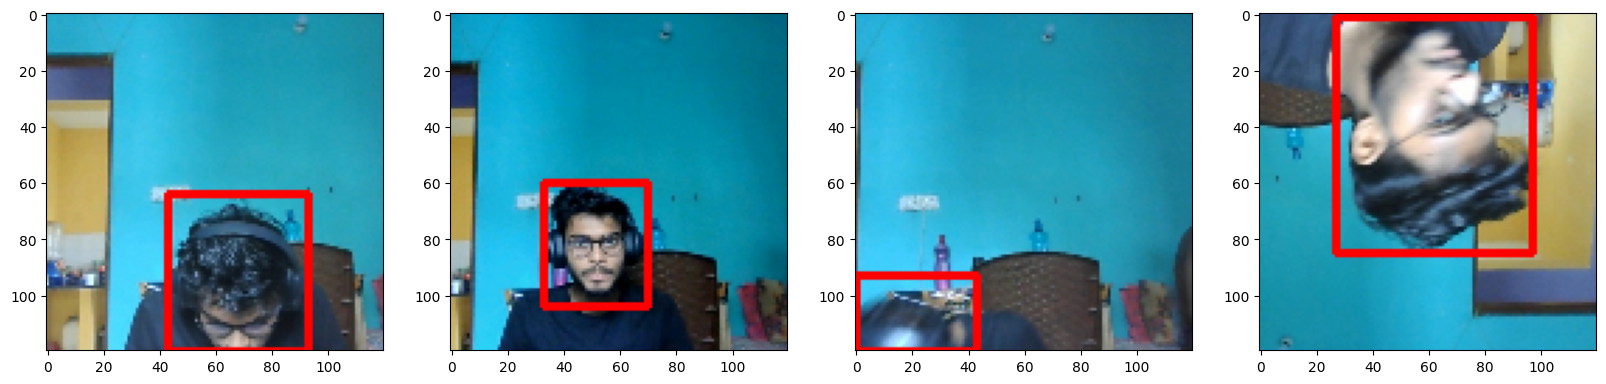

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16


In [52]:
vgg = VGG16(include_top=False)

In [53]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [54]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [55]:
facetracker = build_model()

In [56]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [57]:
X, y = train.as_numpy_iterator().next()

In [58]:
X.shape

(8, 120, 120, 3)

In [59]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 714ms/step


In [60]:
classes, coords

(array([[0.28204846],
        [0.3244799 ],
        [0.39413023],
        [0.4223111 ],
        [0.4285447 ],
        [0.52739584],
        [0.43295428],
        [0.4719188 ]], dtype=float32),
 array([[0.3607081 , 0.47106475, 0.2618099 , 0.5851148 ],
        [0.45490974, 0.5381281 , 0.28650585, 0.61754584],
        [0.46055108, 0.47848117, 0.28786448, 0.58073574],
        [0.41608244, 0.50620383, 0.3842178 , 0.58756983],
        [0.49935874, 0.46011886, 0.35924026, 0.61585516],
        [0.36961275, 0.52252376, 0.3305595 , 0.5436305 ],
        [0.4693153 , 0.49710014, 0.39194608, 0.6110384 ],
        [0.39308676, 0.4780921 , 0.30667177, 0.5772959 ]], dtype=float32))

In [61]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [62]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [63]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [64]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [65]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.1559763>

In [66]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.86827946>

In [67]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.1559763>

In [68]:
class FaceTracker(Model): 
    def __init__(self, facetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

model = FaceTracker(facetracker)


In [69]:
model = FaceTracker(facetracker)

In [70]:
model.compile(opt, classloss, regressloss)

In [71]:
logdir='logs'

In [72]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [73]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
473/473 [==============================] - 536s 1s/step - total_loss: 0.3535 - class_loss: 0.0623 - regress_loss: 0.3224 - val_total_loss: 0.3019 - val_class_loss: 0.1428 - val_regress_loss: 0.2305
Epoch 2/5
473/473 [==============================] - 541s 1s/step - total_loss: 0.1379 - class_loss: 0.0367 - regress_loss: 0.1196 - val_total_loss: 0.0190 - val_class_loss: 4.4371e-04 - val_regress_loss: 0.0188
Epoch 3/5
473/473 [==============================] - 578s 1s/step - total_loss: 0.0833 - class_loss: 0.0234 - regress_loss: 0.0716 - val_total_loss: 0.0115 - val_class_loss: 9.4329e-04 - val_regress_loss: 0.0110
Epoch 4/5
473/473 [==============================] - 573s 1s/step - total_loss: 0.0687 - class_loss: 0.0210 - regress_loss: 0.0582 - val_total_loss: 0.0105 - val_class_loss: 1.4485e-04 - val_regress_loss: 0.0105
Epoch 5/5
473/473 [==============================] - 576s 1s/step - total_loss: 0.0529 - class_loss: 0.0170 - regress_loss: 0.0444 - val_total_loss: 0.0189 

In [74]:
hist.history

{'total_loss': [0.027972549200057983,
  0.03893720731139183,
  0.018163472414016724,
  0.09441079199314117,
  0.008282511495053768],
 'class_loss': [0.00020779340411536396,
  0.019975395873188972,
  0.008403575047850609,
  0.03658997267484665,
  0.00021688158449251205],
 'regress_loss': [0.02786865271627903,
  0.02894951030611992,
  0.013961683958768845,
  0.07611580193042755,
  0.008174071088433266],
 'val_total_loss': [0.30188170075416565,
  0.019043589010834694,
  0.011478979140520096,
  0.010542395524680614,
  0.01893281564116478],
 'val_class_loss': [0.14280474185943604,
  0.00044371018884703517,
  0.0009432877996005118,
  0.00014484944404102862,
  1.5467679986613803e-05],
 'val_regress_loss': [0.23047932982444763,
  0.018821733072400093,
  0.011007335036993027,
  0.010469971224665642,
  0.018925081938505173]}

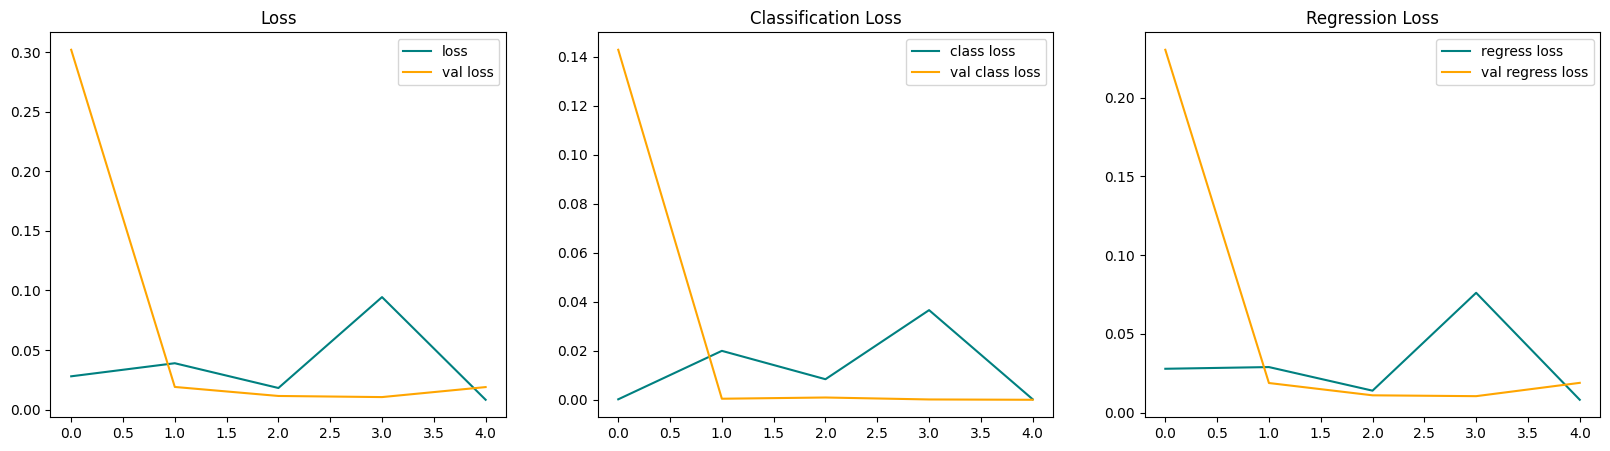

In [75]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [76]:
test_data = test.as_numpy_iterator()

In [77]:
test_sample = test_data.next()

In [78]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 175ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


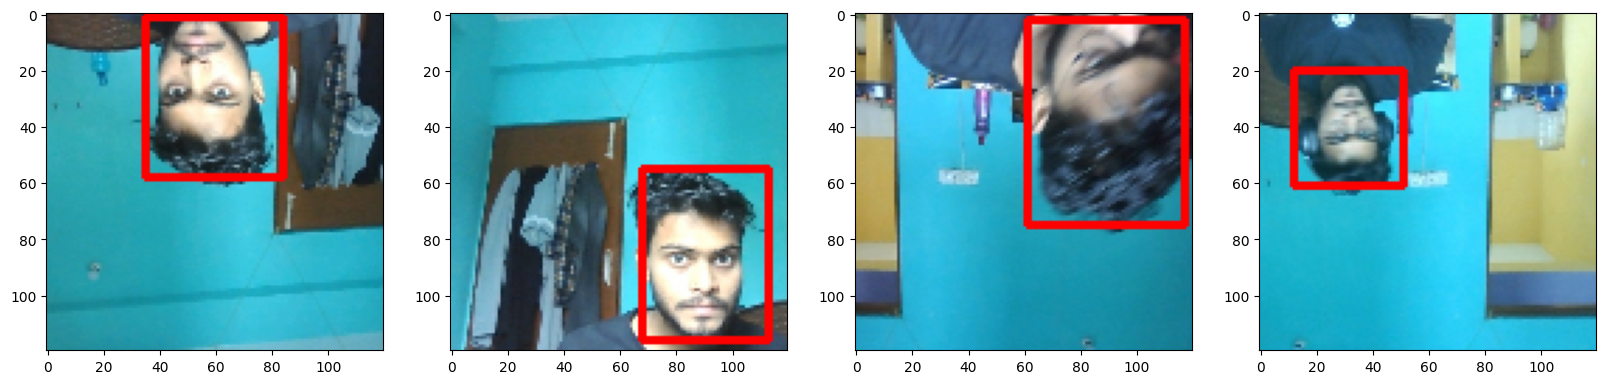

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [80]:
from tensorflow.keras.models import load_model

In [81]:
facetracker.save('facetracker.h5')

In [82]:
facetracker = load_model('facetracker.h5')

In [83]:
import cv2

In [84]:
print (cv2.__version__)

4.7.0


In [85]:
import tensorflow as tf

In [86]:
print (tf.__version__)

2.12.0


In [88]:
import numpy as np

In [89]:
print(np.__version__)

1.23.5


In [90]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 50ms/step



KeyboardInterrupt

